# TP4 - Problem 04

In [ ]:
## Import
# Python
import pandas as pd
import numpy as np

# R
import rpy2.robjects as ro
from rpy2.robjects import pandas2ri
from rpy2.robjects.packages import importr
from rpy2.robjects.conversion import localconverter

print("Imports complete.")

Imports complete.


In [14]:
## Download the dataset

# Import the ISLR package
ISLR = importr('ISLR')

# Load the Default dataset
ro.r['data']('Default', package='ISLR')

with localconverter(ro.default_converter + pandas2ri.converter):
    default_df = ro.r['Default']

# Convert the R dataframe to a pandas dataframe
# default_df = pandas2ri.rpy2py(default_df)

print("Dataset loaded.")
print(default_df.head())

# convert to csv
# default_df.to_csv('Default.csv', index=False)

Dataset loaded.
  default student      balance        income
1      No      No   729.526495  44361.625074
2      No     Yes   817.180407  12106.134700
3      No      No  1073.549164  31767.138947
4      No      No   529.250605  35704.493935
5      No      No   785.655883  38463.495879


In [16]:
## Test data
default_df = pd.read_csv('./dataset/Default.csv')
default_df.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


### About the dataset

It is a simulated dataset designed to help you predict whether a customer will *default* (fail to pay their debt) based on several key factors.

**Dataset Composition**

The dataset consists of 10,000 observations across 4 specific variables:

- `default` (The Target Variable): A factor with two levels, "Yes" and "No," indicating whether the customer defaulted on their debt.

- `student`: A factor ("Yes" or "No") indicating if the customer is a student.

- `balance`: The average monthly balance remaining on the customer’s credit card after making their payment.

- `income`: The customer's annual income. 

### 1. Explore the relationship between defualt and other variables (income, balance, student). You may create some scatterplots, and boxplots.

In [17]:
## Exploratory Data Analysis
import seaborn as sns
import matplotlib.pyplot as plt

# ensore the default column is cate
default_df['default'] = default_df['default'].astype('category')
print(default_df.dtypes)

default    category
student      object
balance     float64
income      float64
dtype: object


In [20]:
# describe the dataset
default_df.describe()

,balance,income
count,10000.000000,10000.000000
mean,835.374886,33516.981876
std,483.714985,13336.639563
min,0.000000,771.967729
25%,481.731105,21340.462903
50%,823.636973,34552.644802
75%,1166.308386,43807.729272
max,2654.322576,73554.233495


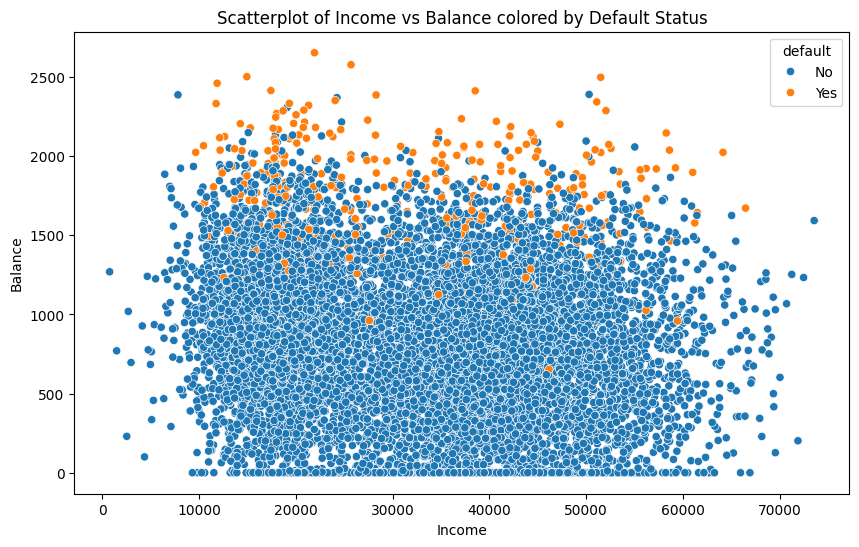

In [ ]:
# Scatterplot: income vs balance colored by default
plt.figure(figsize=(10, 6))
sns.scatterplot(data=default_df, x='income', y='balance', hue='default')
plt.title('Scatterplot of Income vs Balance colored by Default Status')
plt.xlabel('Income')
plt.ylabel('Balance')
plt.show()

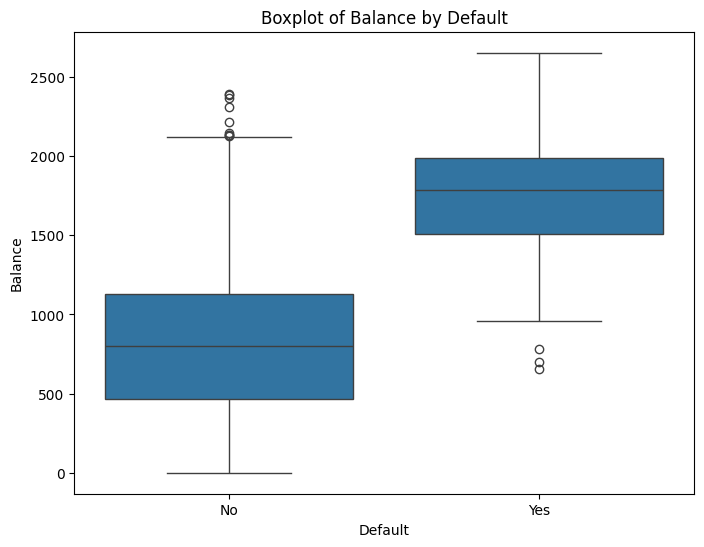

In [21]:
# Boxplot: balance by default
plt.figure(figsize=(8, 6))
sns.boxplot(data=default_df, x='default', y='balance')
plt.title('Boxplot of Balance by Default')
plt.xlabel('Default')
plt.ylabel('Balance')
plt.show()

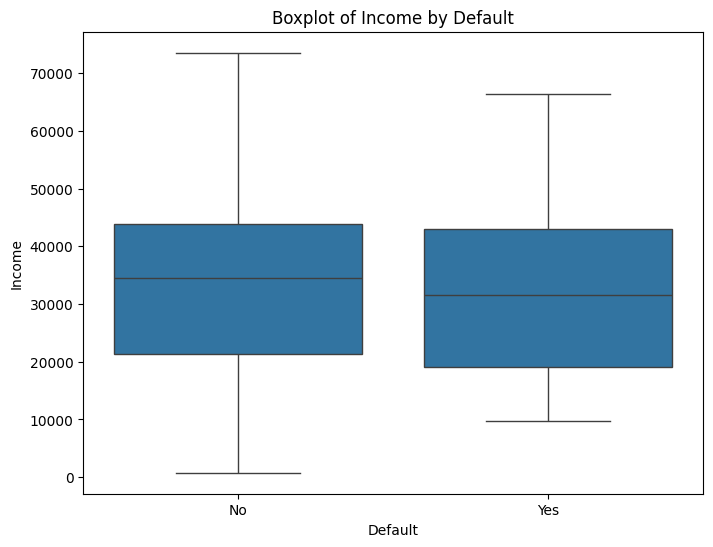

In [22]:
# Boxplot: income by default
plt.figure(figsize=(8, 6))
sns.boxplot(data=default_df, x='default', y='income')
plt.title('Boxplot of Income by Default')
plt.xlabel('Default')
plt.ylabel('Income')
plt.show()

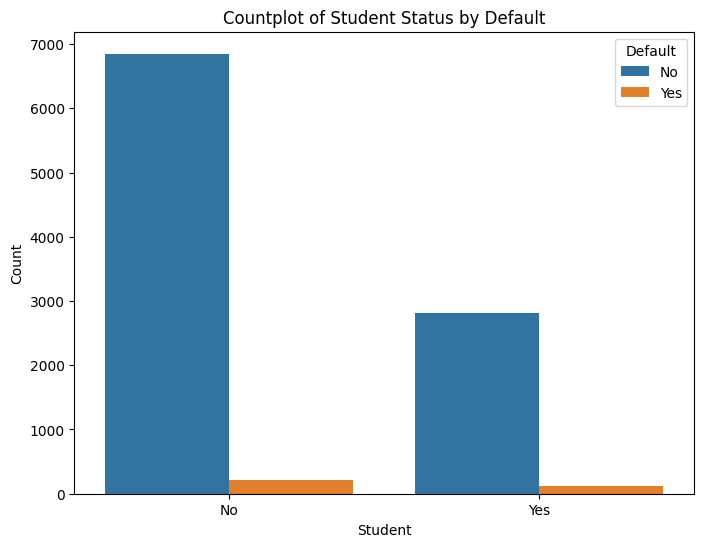

In [23]:
# Countplot: student status by default
plt.figure(figsize=(8, 6))
sns.countplot(data=default_df, x='student', hue='default')
plt.title('Countplot of Student Status by Default')
plt.xlabel('Student')
plt.ylabel('Count')
plt.legend(title='Default')
plt.show()

### Key Insights for Analysis

- **Class Imbalance**: The data is highly imbalanced; only about 3.3% of the customers in the dataset actually defaulted. This means a model that simply predicts "No" for everyone would be ~96.7% accurate, so metrics like `Sensitivity` and `AUC` should be prioritized rather than just `accuracy`.

- **Primary Predictors**: Statistical analysis typically shows that balance is the most significant predictor of default. As the balance increases, the probability of default rises sharply.

- **The "Student" Paradox**: Interestingly, when analyzed alone, students appear more likely to default. However, when you control for balance in a multiple logistic regression, students are actually less likely to default than non-students with the same balance. This is because students generally carry higher average balances. 

### 2. Check if two-ways and three-way interactions are significant.

In [24]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Ensure the 'default' column is binary (0/1) for logistic regression
default_df['default_binary'] = default_df['default'].cat.codes

# Fit a logistic regression model with two-way and three-way interactions
formula = "default_binary ~ balance * income * student"
model = smf.logit(formula=formula, data=default_df).fit()

# Print the summary of the model
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.078548
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:         default_binary   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9992
Method:                           MLE   Df Model:                            7
Date:                Mon, 12 Jan 2026   Pseudo R-squ.:                  0.4621
Time:                        22:45:36   Log-Likelihood:                -785.48
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                2.961e-287
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                       -10.8323      1.962     -5.520      0

### 3. Choose the best model (including interactions if they are significant). Interpret the coefficient estimate of model

In [25]:
# Fit the best model based on significant terms
formula = "default_binary ~ balance + income + student + balance:student"
best_model = smf.logit(formula=formula, data=default_df).fit()

# Print the summary of the best model
print(best_model.summary())

# Interpret coefficients
coefficients = best_model.params
print("\nCoefficient Interpretation:")
for var, coef in coefficients.items():
    print(f"{var}: {coef:.4f} (log-odds)")

Optimization terminated successfully.
         Current function value: 0.078567
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:         default_binary   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9995
Method:                           MLE   Df Model:                            4
Date:                Tue, 13 Jan 2026   Pseudo R-squ.:                  0.4620
Time:                        00:25:15   Log-Likelihood:                -785.67
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                6.766e-291
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                -10.9929      0.567    -19.397      0.000     -12.104     